# MSDS7333 Case Study 2: Signal Frontier Analysis
## Calculating a Momentum Portfolio
Julien Bataillard
Jared Law
Dennis Murray
Cory Nichols

# Abstract

Signal processing techniques are extremely popular in equity and commodities trading strategies. Also called technical analysis, these signal processing methods disregard and often outperform fundamental valuation methods such as buying and selling securities based on a price to earnings ratio [1,2]. Instead, technical analysis uses historical data to make bets on the future of stock prices given key assumptions. We empirically analyze strategies for one technical analysis method: momentum investing, which uses a stock's trend over a certain lookback period to signal to the investor whether to buy or sell. We find that intermediate term momentum investing strategies result in the highest return.

// Julien Abstract

We find many intermediate term combinations of holding and lookback periods outperform the S&P 500 over a time frame from January 1st, 2016 to June 1st, 2016. from [1] by exploring a "simplified" cross-sectional momentum portfolio. This strategy consists of picking high return stocks from the previous 3-12 months and getting rid of underperforming ones over the same time period, hence the momentum. These portfolios tend to perform well for the following 12 months at the most. The study applies to only 5 stocks (different from the textbook) from the fast food industry and the results are close to the example in terms of high rate of return and holding period values.

# Introduction

Time series data is plentiful in finance. Equities are traded in nanoseconds based on market signals and automated analytics. Investment firms and hedge funds often employ engineers and other technically trained and educated individuals to apply signal processing methods to financial time series data. This practice has unearthed multitudes of algorithms and data analysis methods for trading equities all now considered "technical analysis." These technical analysis methods are often run contrary to the idea of the efficient market hypothesis, which assumes that security prices reflect all available information.

One such technical analysis method is momentum investing. At the heart of momentum investing is the assumption that signals are rarely completely random and have some degree of consistency of pattern [1]. Momentum investing also assumes that once a trend is established, the trend is likely to continue rather than revert. Investors applying a momentum strategy make bets on the future based on this trend, instead of the current stock price and fundamental analysis methods such as liquidity and price to earnings ratios. 

A momentum investor's goal is to capitalize on the continuance of existing trends in the market [3]. The two critical parameters of momentum investing are the lookback and holding periods. Typically, an investor will take a long position in an asset that is trending upward and a short position in an asset that is trending downward. The most common tool to establish this trending component is to draw a line between two points on a time series and calculate a cumulative return:

$$return = {t_2 - t_1\over t_1}$$

Where the difference between time two and time one is the lookback period. This lookback period can be many frequency types: daily, hourly, monthly or yearly. In this paper, we choose a business daily lookback frequency. This lookback period and associated return allow weighting of equities in a portfolio. For example, given a lookback period of 30 days, if two out of five stocks are trending downward (have a negative return), these stocks would be down weighted in the portfolio. If the remaining stocks have an increasing trend, these stocks would be upweighted in the portfolio. 

We then retain this mix of upweighted and downweighted stocks over a given "holding period," capturing compound returns on our portfolio. This holding period can also take on any frequency, however, it should be consistent with the lookback period frequency.

Based on the choice of lookback period, momentum investment strategies can be broken down into three different sub-strategies: short term, intermediate term and long term momentum. Short term momentum strategies utilize one month or less of a lookback period, while long term strategies typically utilize greater than three years. Both long and short term strategies have been empirically shown to experience significant reversion. Trends often change to the detriment of the investor [4]. However, intermediate term strategies, which use a lookback period of six to eighteen months show greater success, resulting in no reversals.[5]

In our example, we use seven fast food equities to test various lookback and holding periods of a momentum investing strategy. 

Finish this part

# Literature Review?

# Methods

# Results

# Future Work and Considerations

------
------

## Code Base (Dont Delete)

In [1]:
import datetime as dt

import pandas as pd
from pandas import Series, DataFrame
from pandas_datareader import data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set date range
date_time_start = dt.datetime(2016, 1, 1)
date_time_end = dt.datetime(2017, 6, 1)

In [3]:
# add SPY (S&P 500 Index) to check for market correlations, comparisons for returns
def get_portfolio():
    ''' Get portfolio of stocks using buggy Yahoo'''
    
    port = pd.DataFrame()
    names = ['DPZ', 'PZZA', 'YUM', 'FRSH', 'MCD', 'KHC', 'PLAY', 'SPY']
    for stock in names:
        while True:
            try:
                port[stock] = web.get_data_yahoo(stock, date_time_start, date_time_end)['Adj Close']
                break
            except:
                print('Unable to read stock: {0}, trying again'.format(stock))
    return port

px = get_portfolio()
px = px.loc[~(px==0).all(axis=1)] # strip out days with no trading data for all stocks

In [4]:
# daily adjusted close prices for pizza portfolio 
px.head()

,DPZ,PZZA,YUM,FRSH,MCD,KHC,PLAY,SPY
Date,,,,,,,,
2016-01-04,107.016136,53.639576,49.635929,10.92,111.198700,68.692657,41.709999,193.041077
2016-01-05,107.701935,53.414898,49.512199,10.77,112.730759,69.344627,41.889999,193.367584
2016-01-06,107.545174,51.363480,49.161636,11.23,111.974197,69.476913,42.439999,190.928375
2016-01-07,104.586395,49.546516,47.484421,10.71,109.382896,67.936745,41.209999,186.347717
2016-01-08,106.761391,47.504875,46.838276,10.26,109.212654,67.256439,39.509998,184.302277


In [5]:
# pepperoni pizza?
px.describe()

,DPZ,PZZA,YUM,FRSH,MCD,KHC,PLAY,SPY
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,150.081639,70.684679,60.116682,6.822717,119.307897,82.016308,47.435770,211.095685
std,26.632106,12.199153,5.646775,2.500708,8.940297,6.572037,9.581822,15.865322
min,102.048889,44.447296,45.143360,3.780000,106.960632,65.385567,31.080000,175.601883
25%,128.977921,59.137615,56.927414,4.650000,112.730759,78.209389,39.470001,200.518143
50%,148.811310,74.692879,61.966843,6.030000,117.558563,84.319641,45.330002,210.308289
75%,169.237442,79.682266,63.460941,8.475000,122.494331,86.370911,56.189999,223.210510
max,216.474655,88.525841,73.412682,12.810000,151.927551,93.931450,68.639999,240.555542


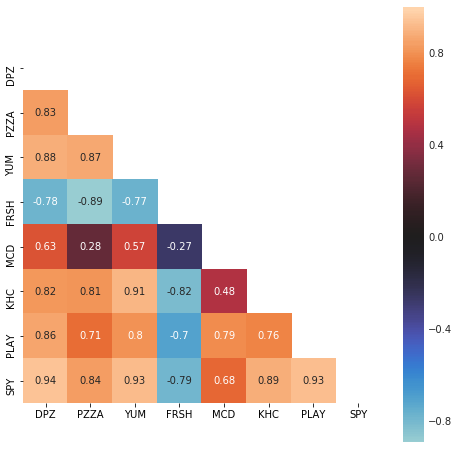

In [6]:
# check linear relationships, including SP 500
corr = px.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 8))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, center=0, square=True, annot=True)

Pizza Stocks mostly outperform SP 500 Greatly


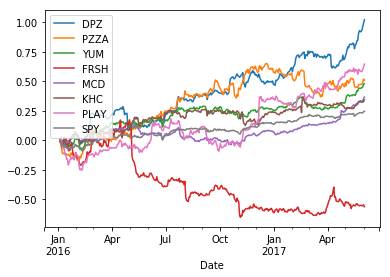

In [7]:
# transform to business day frequency and calculate percentage change
# show cumulative returns over frequency of business days

px = px.asfreq('B').fillna(method='pad') # pad == ffill
rets = px.pct_change()
print('Pizza Stocks mostly outperform SP 500 Greatly')
((1+rets).cumprod()-1).plot()
plt.show()

In [8]:
# potential reference: https://www.investopedia.com/terms/m/momentum_investing.asp
# compute momentum over a lookback and rank in ASCENDING order and standardize to get portfolio weights
# base code is not momentum out of the box, it is mean reversion, we can change to momentum by changing asc to True
# these form the weights for our portfolio and are based on standardized momentum ranks so we sum to 0 as part of
# our portfolio
# ascending = True - momentum
# ascending = False - mean reversion

def calc_mom(price, lookback, lag):
    '''Calculates pct change based on user input shift and lookback period, ranks, then standardizes ranks'''
    mom_ret = price.shift(lag).pct_change(lookback) # price shift forward lag periods (EOD) and calc % change based on
                                                    # lookback cumulative return for each day in index
    ranks = mom_ret.rank(axis=1, ascending=True)  # rank top performers for each day (ASCENDING = weight stocks with
                                                  # positive trend greater - this is momentum)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0) # subtract the mean rank for the portfolio for each day
    return demeaned.divide(demeaned.std(axis=1), axis=0) # divide by sd of the ranks for each day to standardize

Now set up backtesting function to calculate a portfolio 

by iterating over lookbacks and holding period

In [9]:
compound = lambda x : (1+x).prod()-1     # compound calc to give us compound returns for each holding period
daily_sr = lambda x : x.mean() / x.std() # calculate mean portfolio return divided by std deviation to get sharpe

# Sharpe Ratio is avg return above risk free rate 
# Subtracting the risk-free rate from the mean return, 
# the performance associated with risk-taking activities can be isolated.
# > sharpe ratio = more attractive risk adjusted return
# (https://www.investopedia.com/terms/s/sharperatio.asp)

def strat_sr(prices, lb, hold):
    # Compute portfolio weights using rank-standardized momentum portfolio
    freq = '%dB' % hold # set up holding period
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq).first() # shift out weights to apply to next period returns, resample holding
                                                # period and take first relevant value for weights
    returns = daily_rets.resample(freq).apply(compound) # resample daily returns and calc compound returns for each
                                                        # frequency bucket
    port_rets = (port * returns).sum(axis=1)
    return port_rets, daily_sr(port_rets) * np.sqrt(252 / hold) 
    
    # THE ANSWER HAS BEEN REVEALED (regarding sharpe ratio scaling which is an annual value inherently)
    # the scaling factor is an approximation,  
    # Use K as a scaling factor to adjust for the cases when our data is sampled more frequently than annually
    # https://augmentedtrader.com/2015/09/02/why-multiply-by-sqrt252-to-compute-the-sharpe-ratio/

In [10]:
strat_sr(px.iloc[:,:-1], 90, 140)[1]

5.801789305260302

In [20]:
# sharpe ratio comparison setup
from collections import defaultdict

lookbacks = range(10, 230, 10)
holdings = range(10, 230, 10)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px.iloc[:,:-1], lb, hold)[1]
        
ddf = pd.DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

In [21]:
def heatmap(df, cmap = plt.cm.gray_r):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap = cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

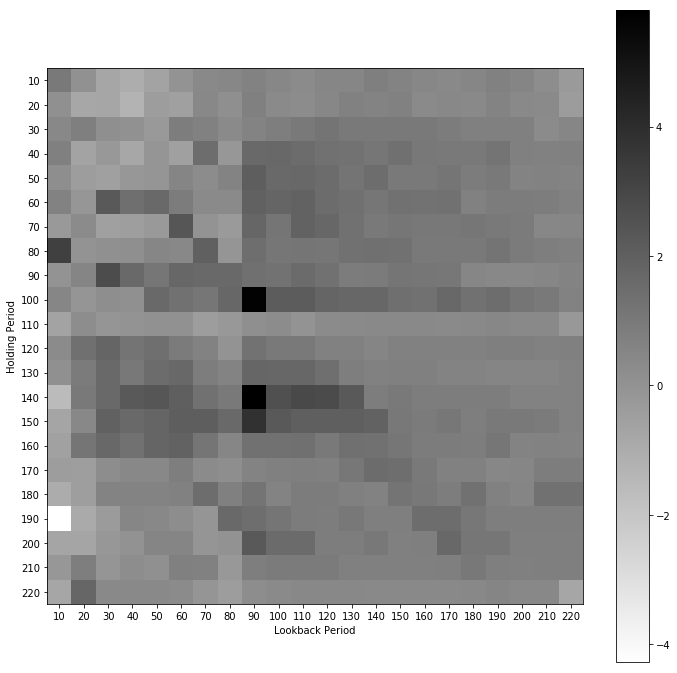

In [22]:
heatmap(ddf)
plt.show()

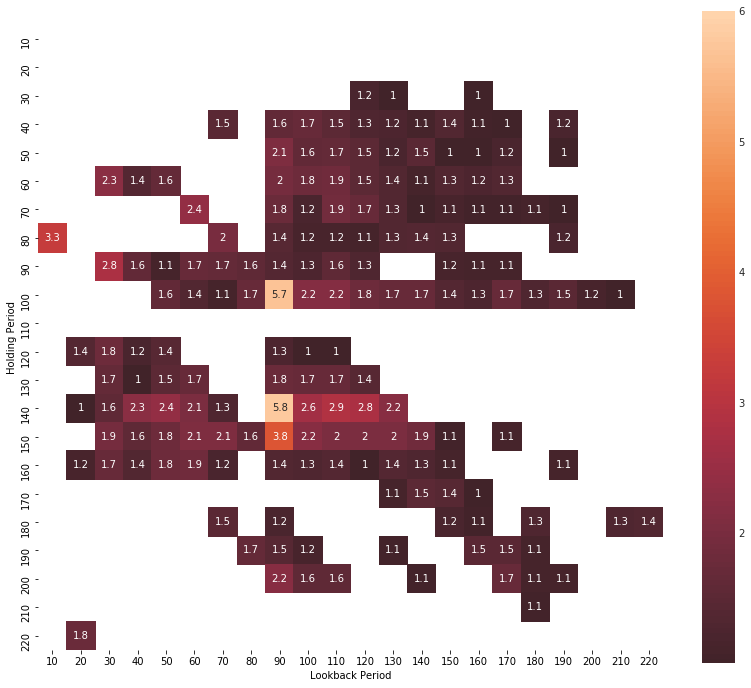

In [23]:
# a better viz, clusters around intermediate term lookbacks and holding periods for greater Sharpe Ratios
df = ddf[ddf>1]
#mask = np.zeros_like(df)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(14, 12))
with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=None, vmax=6, center=0, square=True, annot=True)

# Scratch Work for more "Context"

In [19]:
# Calculate S&P cumulative return for same analysis period
((1+px['SPY'].pct_change()).cumprod()-1).iloc[-1]

0.24613655154855385

In [20]:
# Calculate portfolio cumulative return approximation for same analysis period 
# w/equal weight (if we held from day 1 and did not trade momentum)

wts = [.14275, .14275, .14275, .14275, .14275, .14275, .14275]
(((1+px.iloc[:,:-1].pct_change()*wts).cumprod()-1).iloc[-1]).sum() # considering equal weighting

0.33516847450367726

### Annualized Check (should be roughly similar to returns above)

In [21]:
# annualized returns for our portfolio
wts = ([.14275, .14275, .14275, .14275, .14275, .14275, .14275])
mean_daily_returns = px.iloc[:,:-1].pct_change().mean()
portfolio_return = round(np.sum(mean_daily_returns * wts) * 370, 4)
portfolio_return

0.3273

In [22]:
# annualized returns for S&P 500
mean_daily_returns = px.iloc[:,-1].pct_change().mean()
portfolio_return = round(np.sum(mean_daily_returns) * 370, 4)
portfolio_return

0.2302

### Pizza portfolio dominates! Now for Sharpe ratio, take best case scenario from momentum investing:

In [23]:
print(strat_sr(px.iloc[:,:-1], 90, 100)[1])

5.6747900846309305


In [24]:
# get S&P sharpe for same periods to compare apples to apples
SP_holding = (px['SPY'].pct_change()).resample('100B').apply(compound)
print(SP_holding.mean()/SP_holding.std()*np.sqrt(252 / 100))

2.5238640171652356


### Pizza Portfolio is unstoppable, now for returns with our momentum portfolio

In [25]:
((1+SP_holding).cumprod()-1).iloc[-1]
# this is equal to cum return on daily

0.24613655154855807

In [26]:
# ridiculous returns (this is ONE strategy, and returns variable)
port_rets = strat_sr(px.iloc[:,:-1], 90, 100)[0]
((1+port_rets).cumprod()-1).iloc[-1]

5.2960146153426555

In [27]:
DPZ_holding = px['DPZ'].pct_change().resample('100B').apply(compound)
(1+DPZ_holding).cumprod()-1

Date
2016-01-04    0.129841
2016-05-23    0.392600
2016-10-10    0.723839
2017-02-27    1.022823
Name: DPZ, dtype: float64

In [28]:
# check out this variability in returns, for a lookback of 30, HP of 10
port_rets = strat_sr(px.iloc[:,:-1], 30, 10)[0]
((1+port_rets).cumprod()-1).iloc[-1]

-0.767662430992256

### Take a look at the different Sharpe combinations

In [29]:
# what is greater than 1? risk free return >1 = good 
# https://www.investopedia.com/articles/07/sharpe_ratio.asp
    
ddf[ddf>1].dropna(how='all').fillna('').iloc[:,:]

Lookback Period,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
Holding Period,,,,,,,,,,,,,,,,,,,,
30,,,,,,,,,,,,1.19932,1.01414,,,1.02579,,,,
40,,,,,,,1.48589,,1.60737,1.6851,1.51783,1.28488,1.23726,1.12624,1.36611,1.07669,1.00169,,1.21477,
50,,,,,,,,,2.08704,1.6452,1.68484,1.51129,1.21865,1.48661,1.00915,1.01537,1.18132,,1.03057,
60,,,2.27666,1.39307,1.64941,,,,1.95672,1.81231,1.87996,1.54393,1.35389,1.13593,1.33914,1.23983,1.34981,,,
70,,,,,,2.3995,,,1.78078,1.19185,1.892,1.73541,1.33543,1.03601,1.14002,1.05475,1.05169,1.12639,1.02368,
80,3.26872,,,,,,1.99676,,1.43593,1.15029,1.15668,1.12394,1.3192,1.38147,1.31592,,,,1.22206,
90,,,2.79821,1.62694,1.13199,1.73784,1.65013,1.5912,1.37592,1.27365,1.58485,1.29391,,,1.16406,1.12871,1.10876,,,
100,,,,,1.63512,1.35223,1.12265,1.70745,5.67479,2.15634,2.15634,1.82377,1.72259,1.72563,1.39342,1.27437,1.70619,1.30363,1.47993,1.17355
120,,1.38759,1.81401,1.21952,1.42753,,,,1.26685,1.00166,1.02583,,,,,,,,,


1. Moskowitz, T., Ooi, Yao, "Time Series Momentum"
2. https://sites.tufts.edu/eeseniordesignhandbook/2015/signal-processing-in-finance/
3. https://www.investopedia.com/terms/m/momentum_investing.asp
4. (Jagdeesh, Narsimhan - Evidence of Predictable Behavior of Security Returns)
5. Narasimhan Jegadeesh and Sheridan Titman “Returns to Buying Winners and Selling Losers: Implications for Stock Market Efficiency”